# Limpieza de Datos y Análisis Exploratorio de Datos

#### **Librerías**

Importamos las librerías necesarias.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar


#### **Lectura del dataset**

Leemos los datos.

In [2]:
import requests
from io import StringIO

# URL del archivo CSV
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2021.csv"  # Reemplaza con la URL real

# Obtener el contenido del archivo
response = requests.get(url)

if response.status_code == 200:
    # Lee el contenido como un DataFrame de pandas
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    
    # Guarda el archivo localmente
    df.to_csv("../data/delitos2021.csv", index=False)
    print("Archivo CSV descargado y guardado como 'archivo_descargado.csv'")
else:
    print("Error al descargar el archivo CSV")

Archivo CSV descargado y guardado como 'archivo_descargado.csv'


In [3]:
df = pd.read_csv('../data/delitos2021.csv', sep=',')

Mostramos las cinco primeras filas del dataframe.

In [4]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,110639,2021,OCTUBRE,MIERCOLES,2021-10-06,0.0,Hurto,Hurto total,NO,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1
1,110640,2021,OCTUBRE,JUEVES,2021-10-07,23.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1
2,110641,2021,OCTUBRE,MIERCOLES,2021-10-06,12.0,Robo,Robo total,SI,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1
3,110642,2021,OCTUBRE,JUEVES,2021-10-07,20.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1
4,110643,2021,OCTUBRE,SABADO,2021-10-09,11.0,Hurto,Hurto total,NO,NO,FLORESTA,10.0,-34.626978,-58.483313,1


#### **Análisis del Dataset**

Consultamos el tamaño del dataset.

In [5]:
df.shape

(111962, 15)

Descripción del Dataset

In [6]:
df.describe()

,id-mapa,anio,franja,comuna,latitud,longitud,cantidad
count,1.119620e+05,111962.0,110222.000000,109378.000000,109383.000000,109383.000000,111962.0
mean,3.668101e+05,2021.0,13.065849,7.441085,-34.614393,-58.437135,1.0
std,3.535329e+05,0.0,6.265939,4.496635,0.033210,0.058557,0.0
min,1.106390e+05,2021.0,0.000000,1.000000,-34.707500,-70.607629,1.0
25%,1.386292e+05,2021.0,9.000000,4.000000,-34.635829,-58.469734,1.0
50%,1.666195e+05,2021.0,14.000000,7.000000,-34.614580,-58.435283,1.0
75%,8.617812e+05,2021.0,18.000000,12.000000,-34.592547,-58.402338,1.0
max,1.114387e+06,2021.0,23.000000,15.000000,-31.420083,-58.342665,1.0


#### **Tipos de Datos**

Tipos de datos de las columnas.

In [7]:
df.dtypes

id-mapa       int64
anio          int64
mes          object
dia          object
fecha        object
franja      float64
tipo         object
subtipo      object
uso_arma     object
uso_moto     object
barrio       object
comuna      float64
latitud     float64
longitud    float64
cantidad      int64
dtype: object

Vemos que la columna fecha tiene como tipo de dato object, cambiamos el tipo de dato a datatime.

In [8]:

df['fecha'] = df['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [9]:
df.fecha.dtypes

datetime64[ns, UTC]

#### **Valores Nulos y transformación de datos**

Vamos a analizar los datos de cada columna para ver si tienen datos nulos fáciles de encontrar o datos nulos que no se pueden econtrar con isnull, y vamos a inspeccionar los datos para normalizarlos, por ejemplo si en la columna dia hay dos lunes, uno con mayúsculas y otro sin mayúsculas, nos quedarmos con un sólo formato. 

In [10]:
df.isnull().sum()

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja      1740
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      2584
comuna      2584
latitud     2579
longitud    2579
cantidad       0
dtype: int64

Podemos ver que las columnas subtipo, uso_armas, barrio y comuna tienen valoes nulos.

##### **Columna barrio**

Analizamos los valores nulos de la columna barrio y comuna.

In [11]:
df[df.barrio.isnull()].comuna.value_counts()

Series([], Name: count, dtype: int64)

In [12]:
df[df.barrio.isnull()].comuna.isnull().sum()

2584

Podemos observar que todas las filas vacías de la columna barrio tienen la columna comuna vacía.  Es decir en las 2584 filas de barrios nulas, no hay el dato correspondiente a comuna. 
Ahora analizamos las columnas latitud y longitud de las mismas filas.

Por lo tanto deberíamos borrar estas filas.

In [13]:
df.dropna(subset=['barrio'], inplace = True)

In [14]:
df.barrio.isnull().sum()

0

In [15]:
df.isnull().sum()

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja      1496
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio         0
comuna         0
latitud        0
longitud       0
cantidad       0
dtype: int64

In [16]:
df.barrio.value_counts()

barrio
PALERMO              8881
BALVANERA            7213
FLORES               6136
RECOLETA             5161
VILLA LUGANO         4904
CABALLITO            4891
ALMAGRO              4226
BARRACAS             4051
CONSTITUCION         3652
BELGRANO             3514
NUEVA POMPEYA        2804
VILLA CRESPO         2779
MATADEROS            2742
VILLA SOLDATI        2670
SAN NICOLAS          2646
RETIRO               2625
VILLA URQUIZA        2311
PARQUE CHACABUCO     2229
MONSERRAT            2160
SAN CRISTOBAL        2062
BOCA                 2051
PARQUE AVELLANEDA    2030
SAAVEDRA             1990
PARQUE PATRICIOS     1948
VILLA DEVOTO         1841
BOEDO                1751
LINIERS              1735
NUÃEZ               1665
CHACARITA            1487
FLORESTA             1449
COLEGIALES           1361
SAN TELMO            1233
VILLA DEL PARQUE     1204
VELEZ SARSFIELD      1005
MONTE CASTRO          963
VILLA GRAL. MITRE     952
VILLA PUEYRREDON      944
VILLA SANTA RITA      913
VILLA

In [17]:
df.shape

(109378, 15)

##### **Columna anio**

In [18]:
df.anio.value_counts()

anio
2021    109378
Name: count, dtype: int64

##### **Columna mes**

In [19]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Para sistemas Unix/Linux
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')  # Para Windows

meses = list(calendar.month_name)[1:]
meses = list(map(str.upper, meses))

In [20]:
df.mes.value_counts().loc[meses]

mes
ENERO          9121
FEBRERO        8546
MARZO          9890
ABRIL          8063
MAYO           7246
JUNIO          8097
JULIO          8829
AGOSTO         9211
SEPTIEMBRE     9313
OCTUBRE        9991
NOVIEMBRE     10424
DICIEMBRE     10647
Name: count, dtype: int64

##### **Columna dia**

In [21]:
df.dia.value_counts()

dia
VIERNES      16893
LUNES        16444
MIERCOLES    16423
JUEVES       16323
MARTES       16199
SABADO       14411
DOMINGO      12685
Name: count, dtype: int64

In [22]:
dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

In [23]:
df.dia.value_counts().loc[dias]

dia
LUNES        16444
MARTES       16199
MIERCOLES    16423
JUEVES       16323
VIERNES      16893
SABADO       14411
DOMINGO      12685
Name: count, dtype: int64

##### **Columna franja**

In [24]:
df.franja.isnull().sum()

1496

In [25]:
df.dropna(subset=['franja'], inplace = True)

In [26]:
df.franja.value_counts().sort_index()

franja
0.0     4470
1.0     2238
2.0     1898
3.0     1719
4.0     1583
5.0     2078
6.0     3019
7.0     4339
8.0     5315
9.0     4921
10.0    5351
11.0    5020
12.0    6009
13.0    5355
14.0    5513
15.0    5369
16.0    5615
17.0    6067
18.0    6469
19.0    6441
20.0    6045
21.0    4949
22.0    4239
23.0    3860
Name: count, dtype: int64

##### **Columna tipo**

In [27]:
df.tipo.value_counts()

tipo
Robo          43865
Hurto         35432
Lesiones      10831
Amenazas      10363
Vialidad       7289
Homicidios      102
Name: count, dtype: int64

##### **Columna subtipo**

In [28]:
df.subtipo.value_counts()

subtipo
Robo total                        43145
Hurto total                       31801
Lesiones Dolosas                  10831
Amenazas                          10363
Lesiones por siniestros viales     7192
Hurto automotor                    3631
Robo automotor                      720
Muertes por siniestros viales        97
Homicidios dolosos                   88
Femicidios                           14
Name: count, dtype: int64

##### **Columna uso_arma**

In [29]:
df.uso_arma.value_counts()

uso_arma
NO    99544
SI     8338
Name: count, dtype: int64

##### **Columna uso_moto**

In [30]:
df.uso_moto.value_counts()

uso_moto
NO    103349
SI      4533
Name: count, dtype: int64

##### **Columna comuna**

In [31]:
df.comuna.value_counts().sort_index()

comuna
1.0     12477
2.0      5077
3.0      9133
4.0     10769
5.0      5886
6.0      4800
7.0      8257
8.0      8082
9.0      6459
10.0     5158
11.0     4859
12.0     5626
13.0     6413
14.0     8734
15.0     6152
Name: count, dtype: int64

##### **Columnas latitud y longitud**

In [32]:
df.latitud.isnull().sum()

0

In [33]:
df.longitud.isnull().sum()


0

##### **Columna cantidad**

In [34]:
df.cantidad.value_counts()

cantidad
1    107882
Name: count, dtype: int64

In [35]:
df.isnull().sum()

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dtype: int64

In [36]:
df.dtypes

id-mapa                   int64
anio                      int64
mes                      object
dia                      object
fecha       datetime64[ns, UTC]
franja                  float64
tipo                     object
subtipo                  object
uso_arma                 object
uso_moto                 object
barrio                   object
comuna                  float64
latitud                 float64
longitud                float64
cantidad                  int64
dtype: object

Guardo el csv

In [37]:
df.to_csv("../data/delitos2021_procesados.csv", index=False)

#### **Estadística Descriptiva**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107882 entries, 0 to 111961
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   id-mapa   107882 non-null  int64              
 1   anio      107882 non-null  int64              
 2   mes       107882 non-null  object             
 3   dia       107882 non-null  object             
 4   fecha     107882 non-null  datetime64[ns, UTC]
 5   franja    107882 non-null  float64            
 6   tipo      107882 non-null  object             
 7   subtipo   107882 non-null  object             
 8   uso_arma  107882 non-null  object             
 9   uso_moto  107882 non-null  object             
 10  barrio    107882 non-null  object             
 11  comuna    107882 non-null  float64            
 12  latitud   107882 non-null  float64            
 13  longitud  107882 non-null  float64            
 14  cantidad  107882 non-null  int64              
dtypes: da

In [39]:
df.describe()

,id-mapa,anio,franja,comuna,latitud,longitud,cantidad
count,1.078820e+05,107882.0,107882.000000,107882.000000,107882.000000,107882.000000,107882.0
mean,3.613454e+05,2021.0,13.070262,7.437645,-34.614529,-58.436991,1.0
std,3.514172e+05,0.0,6.269496,4.493334,0.031584,0.042128,0.0
min,1.106390e+05,2021.0,0.000000,1.000000,-34.703796,-58.531444,1.0
25%,1.378032e+05,2021.0,9.000000,4.000000,-34.635942,-58.469790,1.0
50%,1.665595e+05,2021.0,14.000000,7.000000,-34.614709,-58.435277,1.0
75%,8.539252e+05,2021.0,18.000000,11.000000,-34.592633,-58.402309,1.0
max,1.114387e+06,2021.0,23.000000,15.000000,-34.529133,-58.342665,1.0


In [40]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,110639,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,0.0,Hurto,Hurto total,NO,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1
1,110640,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,23.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1
2,110641,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,12.0,Robo,Robo total,SI,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1
3,110642,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,20.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1
4,110643,2021,OCTUBRE,SABADO,2021-10-09 00:00:00+00:00,11.0,Hurto,Hurto total,NO,NO,FLORESTA,10.0,-34.626978,-58.483313,1


Text(0, 0.5, 'Número de delitos')

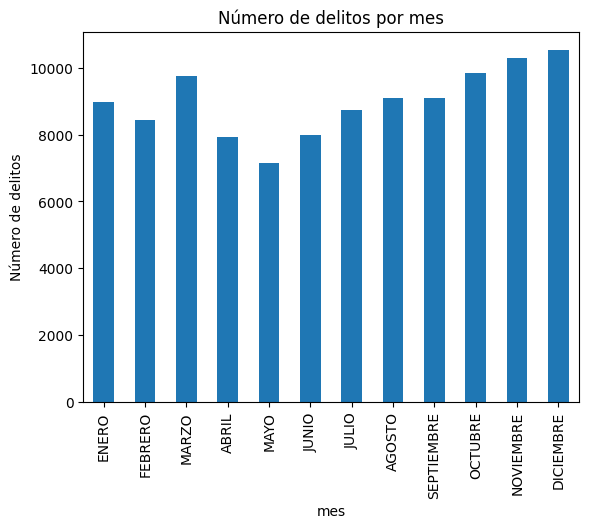

In [41]:
df.mes.value_counts().loc[meses].plot(kind='bar')
plt.title("Número de delitos por mes")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

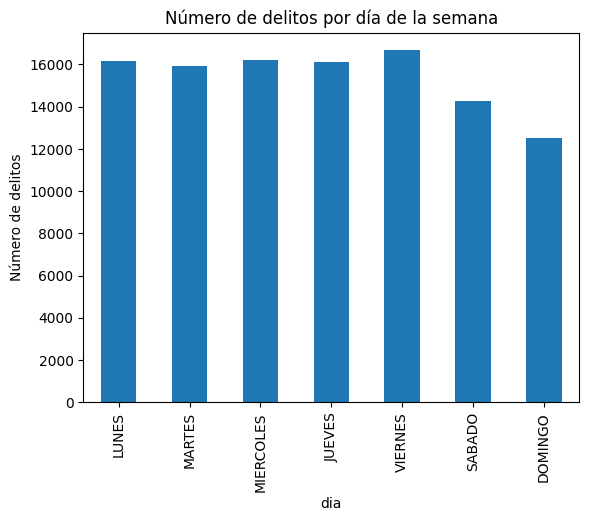

In [42]:
df.dia.value_counts().loc[dias].plot(kind='bar')
plt.title("Número de delitos por día de la semana")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

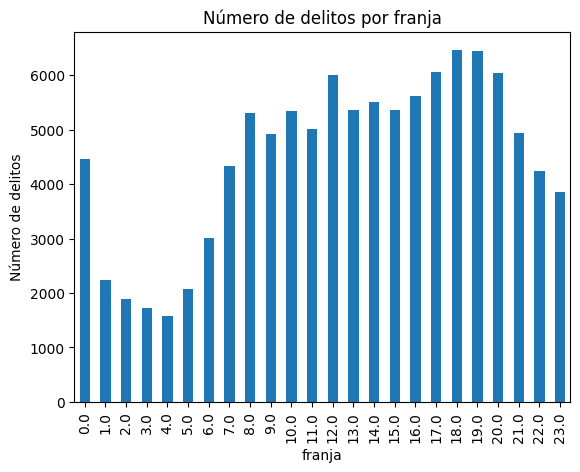

In [43]:
df.franja.value_counts().sort_index().plot(kind='bar')
plt.title("Número de delitos por franja")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

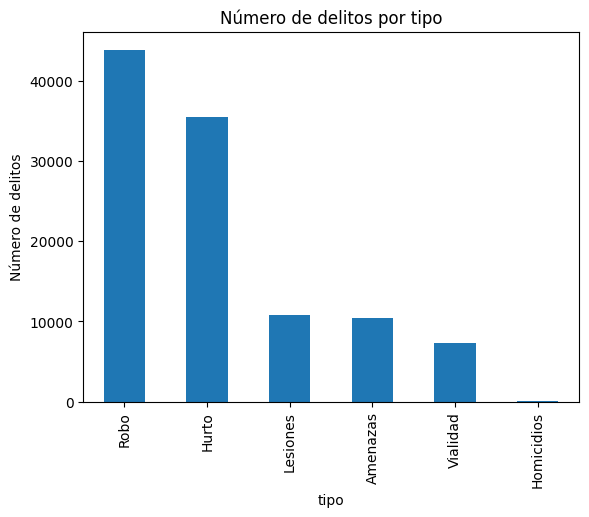

In [44]:
df.tipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por tipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

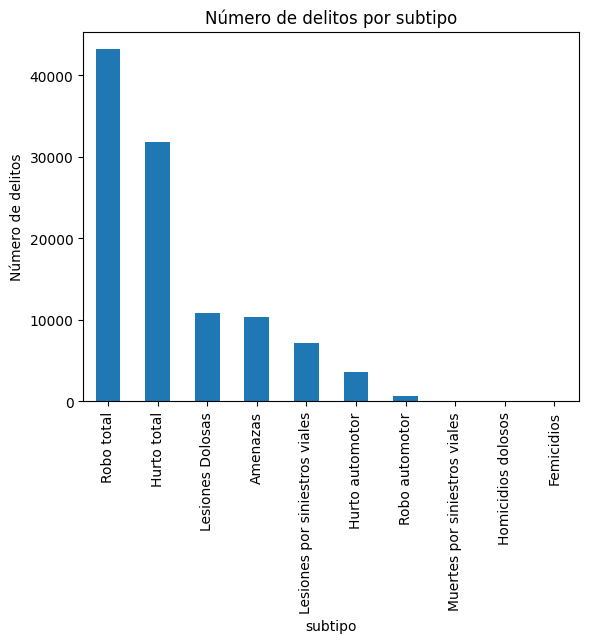

In [45]:
df.subtipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por subtipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, '')

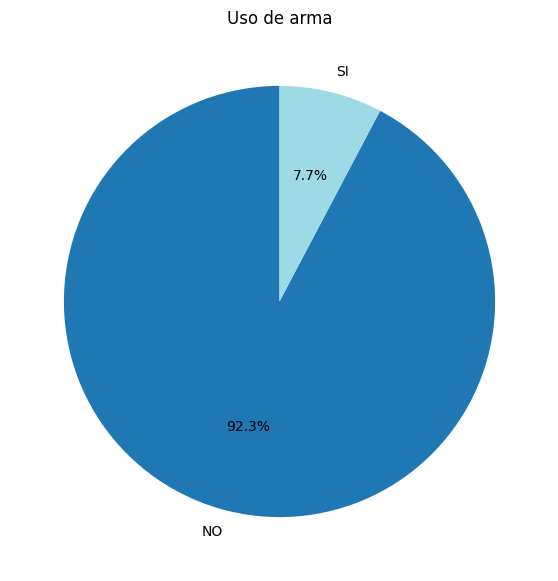

In [46]:
df.uso_arma.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de arma")
plt.ylabel("")  


Text(0, 0.5, '')

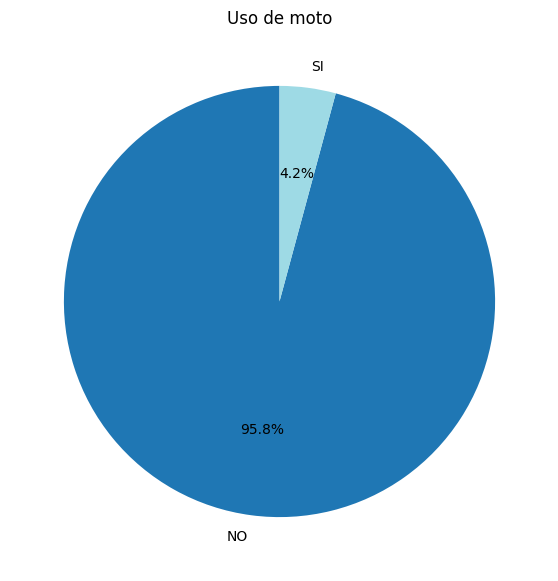

In [47]:
df.uso_moto.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de moto")
plt.ylabel("") 


Text(0, 0.5, 'Número de delitos')

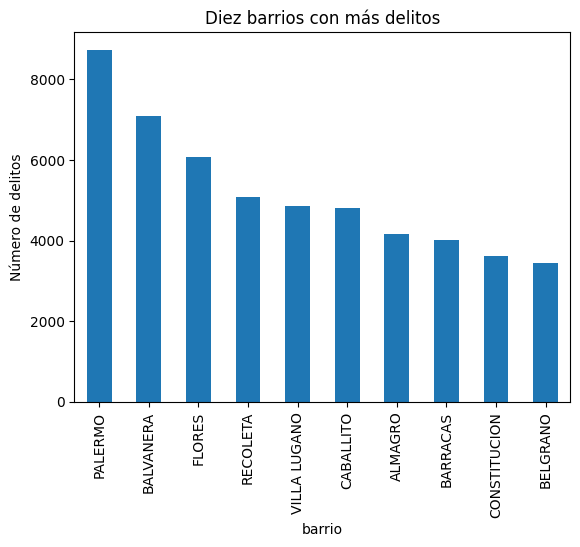

In [48]:
df.barrio.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Diez barrios con más delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

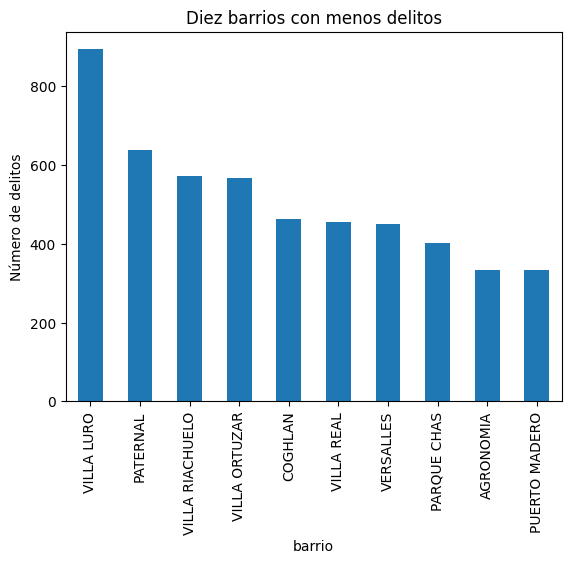

In [49]:
df.barrio.value_counts().sort_values(ascending=False)[-10:].plot(kind='bar')
plt.title("Diez barrios con menos delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos por comuna')

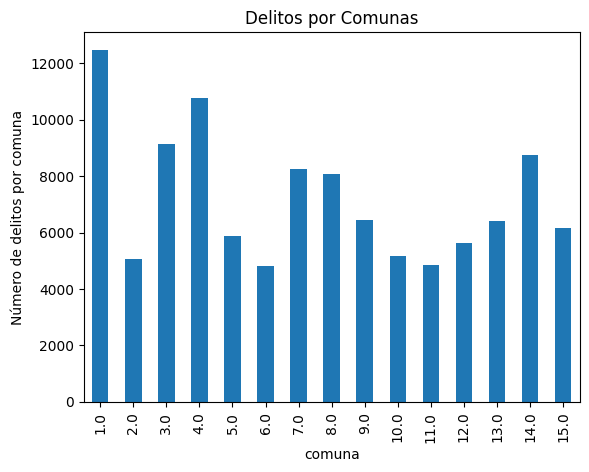

In [50]:
df.comuna.value_counts().sort_index().plot(kind='bar')
plt.title("Delitos por Comunas")
plt.ylabel("Número de delitos por comuna")

#### **Mapa de Calor de Delitos en ls ciudad de Buenos Aires**

In [51]:
import branca
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Agregar capa de calor con las ubicaciones del delito
heat_data = df[['latitud', 'longitud', 'cantidad']].dropna().values
HeatMap(heat_data, radius=12).add_to(mapa)


mapa


En el mapa podemos ver que las regiones más naranjas son los lugares donde se comenten más delitos, seguidas por las amarillas y luego por las verdes.

#### Barrios de cada comuna

In [52]:
comuna_barrio = df.groupby('comuna')['barrio'].apply(lambda x: list(set(x))).reset_index()

In [53]:
pd.set_option('display.max_colwidth', None)

In [54]:
comuna_barrio

,comuna,barrio
0,1.0,"[RETIRO, SAN TELMO, CONSTITUCION, SAN NICOLAS, PUERTO MADERO, MONSERRAT]"
1,2.0,[RECOLETA]
2,3.0,"[BALVANERA, SAN CRISTOBAL]"
3,4.0,"[PARQUE PATRICIOS, NUEVA POMPEYA, BOCA, BARRACAS]"
4,5.0,"[ALMAGRO, BOEDO]"
5,6.0,[CABALLITO]
6,7.0,"[FLORES, PARQUE CHACABUCO]"
7,8.0,"[VILLA LUGANO, VILLA SOLDATI, VILLA RIACHUELO]"
8,9.0,"[PARQUE AVELLANEDA, MATADEROS, LINIERS]"
9,10.0,"[VERSALLES, MONTE CASTRO, FLORESTA, VELEZ SARSFIELD, VILLA REAL, VILLA LURO]"


#### Sutipos de cada tipo de delito

In [55]:
tipo_subtipo = df.groupby('tipo')['subtipo'].apply(lambda x: list(set(x))).reset_index()

In [56]:
tipo_subtipo

,tipo,subtipo
0,Amenazas,[Amenazas]
1,Homicidios,"[Femicidios, Homicidios dolosos]"
2,Hurto,"[Hurto automotor, Hurto total]"
3,Lesiones,[Lesiones Dolosas]
4,Robo,"[Robo automotor, Robo total]"
5,Vialidad,"[Lesiones por siniestros viales, Muertes por siniestros viales]"


#### **Detección de Outliers en la Cantidad de Delitos por Barrio**

<Axes: >

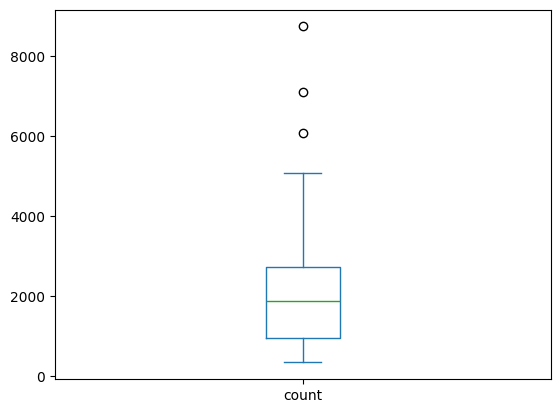

In [57]:
df.barrio.value_counts().plot(kind='box')

Podemos ver en el gráfico que si hay outliers.

#### **Detección de Outliers en la Cantidad de Delitos por Comuna**

<Axes: >

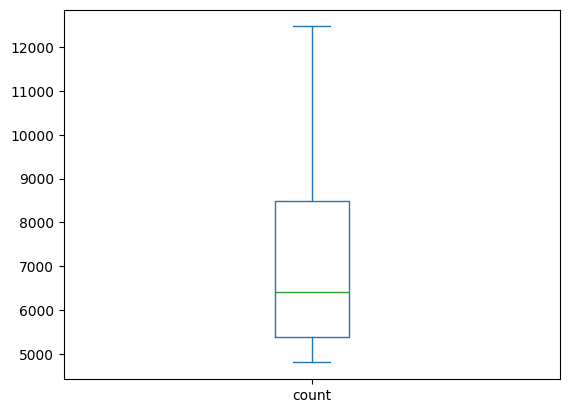

In [58]:
df.comuna.value_counts().plot(kind='box')

In [59]:
df.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

En este caso los datos están distribuidos de manera más uniforme

#### **Tabulación cruzada**

In [60]:
df_tipo_mes = pd.crosstab(df["tipo"], df["mes"])[meses]
df_tipo_mes


mes,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
tipo,,,,,,,,,,,,
Amenazas,927,882,1043,809,756,766,770,818,848,882,922,940
Homicidios,16,10,3,11,6,3,14,1,6,9,12,11
Hurto,2699,2625,3067,2463,2317,2602,2886,3064,3119,3267,3605,3718
Lesiones,1008,851,987,765,644,712,820,870,925,1059,1066,1124
Robo,3840,3630,4010,3324,3145,3272,3596,3631,3584,3834,4049,3950
Vialidad,499,431,650,560,277,637,656,714,631,792,633,809


In [61]:
df_tipo_dia = (pd.crosstab(df["dia"], df["tipo"])).loc[dias]
df_tipo_dia

tipo,Amenazas,Homicidios,Hurto,Lesiones,Robo,Vialidad
dia,,,,,,
LUNES,1648,15,5324,1607,6560,1030
MARTES,1471,17,5319,1371,6713,1046
MIERCOLES,1585,10,5486,1478,6511,1129
JUEVES,1564,18,5422,1420,6486,1198
VIERNES,1543,8,5482,1593,6699,1350
SABADO,1368,12,4655,1647,5715,866
DOMINGO,1184,22,3744,1715,5181,670


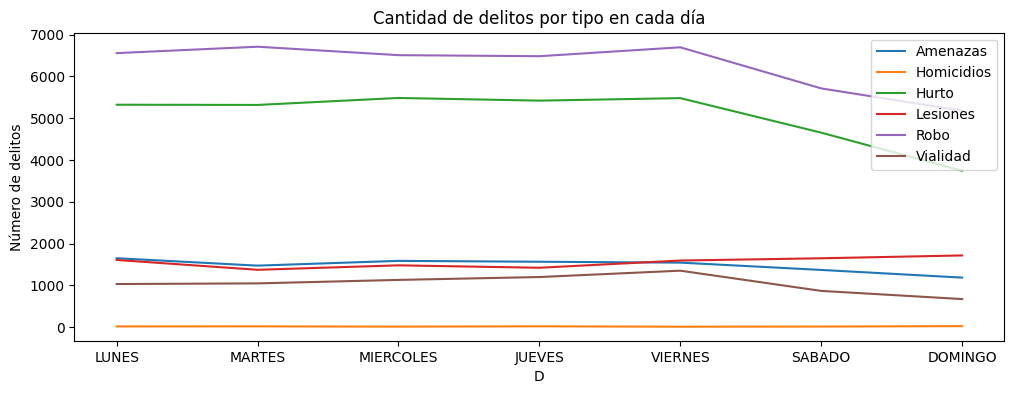

In [62]:
plt.figure(figsize=(12, 4))
for tipo in df_tipo_dia.columns:
    plt.plot(df_tipo_dia.index, df_tipo_dia[tipo], label=tipo)
plt.xlabel('D')  # Eje X: Meses
plt.ylabel('Número de delitos')  # Eje Y: Número de delitos
plt.title('Cantidad de delitos por tipo en cada día')
plt.legend(loc='upper right')

Podemos observar que los delitos como robo, hurto y vialidad reducen el sábado y domingo, mientras que lesiones, amenazas y homicidios se mantienen estables a lo largo de la semana.

In [63]:
df_comuna_mes = pd.crosstab(df["comuna"], df["mes"])[meses]
df_comuna_mes


mes,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
comuna,,,,,,,,,,,,
1.0,982,922,1067,875,838,910,990,1071,1035,1136,1399,1252
2.0,400,407,464,400,334,376,413,422,401,486,472,502
3.0,757,694,804,646,616,659,748,727,799,837,901,945
4.0,988,893,954,832,741,811,822,889,906,979,986,968
5.0,495,460,500,405,422,462,487,478,474,568,564,571
6.0,414,348,420,354,321,369,426,438,374,435,471,430
7.0,675,681,746,582,578,632,689,657,704,757,744,812
8.0,687,599,720,642,532,595,661,734,710,737,716,749
9.0,531,487,596,520,416,474,469,579,529,610,591,657


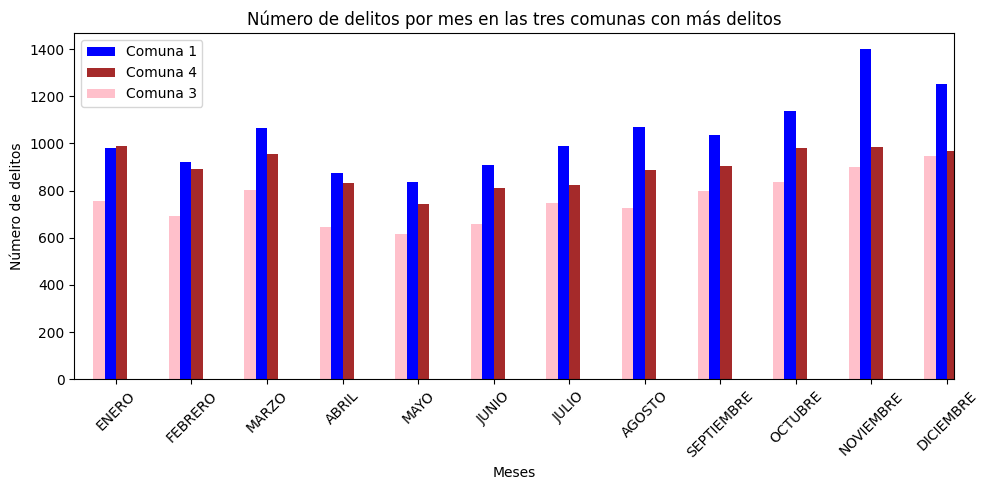

In [64]:
plt.figure(figsize=(10, 5))  

# Graficar 
df_comuna_mes.iloc[0].plot(kind='bar', position=1, width=0.15, label='Comuna 1', color='blue')

df_comuna_mes.iloc[3].plot(kind='bar', position=0, width=0.15, label='Comuna 4', color='brown')

df_comuna_mes.iloc[2].plot(kind='bar', position=2, width=0.15, label='Comuna 3', color='pink')

plt.xlabel('Meses')  
plt.ylabel('Número de delitos')  
plt.title('Número de delitos por mes en las tres comunas con más delitos') 
plt.legend()  

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

En el gráfico podemos observar como en noviembre aumentan los delitos en la Comuna 1 en comparación con octubre, mientras en las comunas 3 y 4 no aumentan tanto.

In [65]:
df.uso_arma.value_counts()

uso_arma
NO    99544
SI     8338
Name: count, dtype: int64

In [66]:
df[df['uso_arma'] == "SI"].tipo.value_counts()

tipo
Robo    8338
Name: count, dtype: int64

In [67]:
df[df['uso_arma'] == "SI"].subtipo.value_counts()

subtipo
Robo total        7769
Robo automotor     569
Name: count, dtype: int64

Podemos observar que las armas se usan para el tipo de delito robos y los subtipos Robo total y Robo automotor.

In [68]:
df[df['uso_moto'] == "SI"].tipo.value_counts()

tipo
Robo    4533
Name: count, dtype: int64

In [69]:
df[df['uso_moto'] == "SI"].subtipo.value_counts()

subtipo
Robo total    4533
Name: count, dtype: int64

Podemos observar que las motos se usan para el tipo de delito Robo, y el subtipo Robo Total.

In [70]:
df.tipo.value_counts()

tipo
Robo          43865
Hurto         35432
Lesiones      10831
Amenazas      10363
Vialidad       7289
Homicidios      102
Name: count, dtype: int64

In [71]:
df_tipo_franja = pd.crosstab(df["tipo"], df["franja"])
df_tipo_franja


franja,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
tipo,,,,,,,,,,,,,,,,,,,,,
Amenazas,1268,207,159,137,81,74,89,133,214,310,...,539,557,557,617,698,610,624,566,458,351
Homicidios,1,6,3,4,3,9,2,3,3,2,...,5,3,5,3,3,4,5,2,10,12
Hurto,1144,616,498,431,389,558,1034,1731,2344,2135,...,1860,1715,1789,1920,1985,1799,1505,1150,1118,1152
Lesiones,555,415,339,328,285,250,273,245,304,299,...,551,523,554,615,642,638,601,566,523,491
Robo,1308,890,818,771,776,1113,1496,2028,2132,1830,...,2058,2092,2139,2363,2672,2989,2981,2362,1906,1670
Vialidad,194,104,81,48,49,74,125,199,318,345,...,500,479,571,549,469,401,329,303,224,184


Text(0, 0.5, 'Número de delitos')

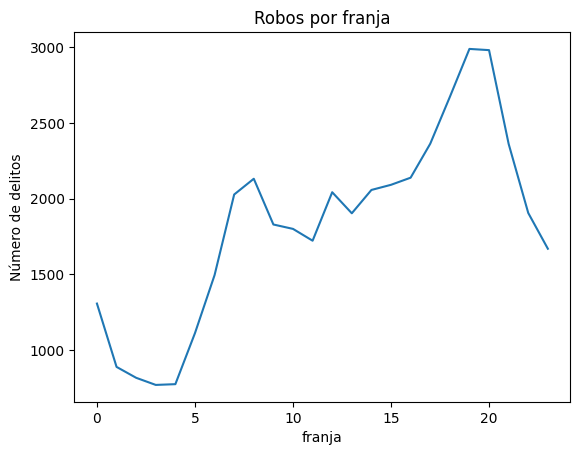

In [72]:
df_tipo_franja.loc['Robo'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que el delito más cometido, el robo, se produce más en las noches, siendo las 20 horas la hora en que más casos se dan.

Text(0, 0.5, 'Número de delitos')

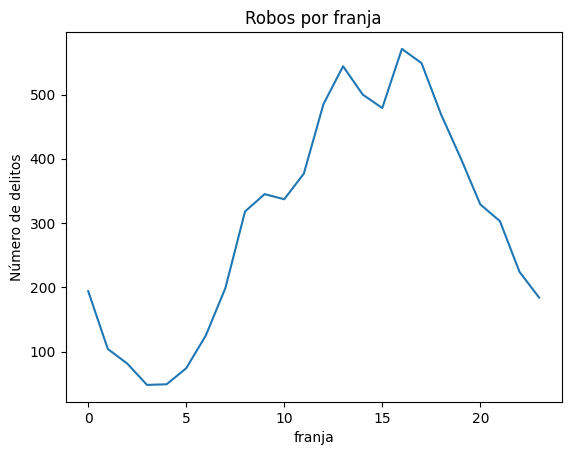

In [73]:
df_tipo_franja.loc['Vialidad'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que los delitos relacionados con la vialidad tienen su pico a partir de las 12 horas hasta las 17 horas.

Identificación de patrones y correlaciones

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "..\data\delitos2021_procesados.csv"
df_limpio = pd.read_csv(url, index_col=0)
df_limpio.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
id-mapa,,,,,,,,,,,,,,
110639,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,0.0,Hurto,Hurto total,NO,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1
110640,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,23.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1
110641,2021,OCTUBRE,MIERCOLES,2021-10-06 00:00:00+00:00,12.0,Robo,Robo total,SI,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1
110642,2021,OCTUBRE,JUEVES,2021-10-07 00:00:00+00:00,20.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1
110643,2021,OCTUBRE,SABADO,2021-10-09 00:00:00+00:00,11.0,Hurto,Hurto total,NO,NO,FLORESTA,10.0,-34.626978,-58.483313,1


In [ ]:
moda_tipo = df_limpio['tipo'].mode()
moda_subtipo = df_limpio['subtipo'].mode()
print(moda_tipo)
print(moda_subtipo)

0    Robo
Name: tipo, dtype: object
0    Robo total
Name: subtipo, dtype: object


In [16]:
df_subtipo_cantidad = pd.crosstab(df_limpio["subtipo"], df_limpio["cantidad"])
df_subtipo_cantidad

cantidad,1
subtipo,
Amenazas,10363
Femicidios,14
Homicidios dolosos,88
Hurto automotor,3631
Hurto total,31801
Lesiones Dolosas,10831
Lesiones por siniestros viales,7192
Muertes por siniestros viales,97
Robo automotor,720


In [12]:
df_subtipo_comuna = pd.crosstab(df_limpio["subtipo"], df_limpio["comuna"])
df_subtipo_comuna


comuna,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
subtipo,,,,,,,,,,,,,,,
Amenazas,1330,370,728,1468,492,389,688,1181,680,539,544,526,430,480,518
Femicidios,1,1,3,1,0,1,2,0,0,0,1,1,1,1,1
Homicidios dolosos,13,0,10,23,4,2,14,8,2,1,0,2,3,2,4
Hurto automotor,144,67,176,319,301,214,259,405,359,293,242,214,148,241,249
Hurto total,3266,1854,2894,2385,1661,1456,2208,1640,1900,1712,1702,1775,2240,3308,1800
Lesiones Dolosas,1813,360,935,1513,431,435,868,1206,579,442,417,419,370,517,526
Lesiones por siniestros viales,803,290,551,565,392,288,484,348,543,457,427,494,463,525,562
Muertes por siniestros viales,8,4,8,15,3,4,8,6,11,2,6,7,7,4,4
Robo automotor,40,4,26,165,22,8,61,129,105,46,32,44,18,5,15


In [23]:
df_tipo_subtipo = pd.crosstab(df_limpio["tipo"], df_limpio["subtipo"])
df_tipo_subtipo

subtipo,Amenazas,Femicidios,Homicidios dolosos,Hurto automotor,Hurto total,Lesiones Dolosas,Lesiones por siniestros viales,Muertes por siniestros viales,Robo automotor,Robo total
tipo,,,,,,,,,,
Amenazas,10363,0,0,0,0,0,0,0,0,0
Homicidios,0,14,88,0,0,0,0,0,0,0
Hurto,0,0,0,3631,31801,0,0,0,0,0
Lesiones,0,0,0,0,0,10831,0,0,0,0
Robo,0,0,0,0,0,0,0,0,720,43145
Vialidad,0,0,0,0,0,0,7192,97,0,0


In [15]:
df_subtipo_barrio = pd.crosstab(df_limpio["subtipo"], df_limpio["barrio"])
df_subtipo_barrio

barrio,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BELGRANO,BOCA,BOEDO,CABALLITO,CHACARITA,COGHLAN,...,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
subtipo,,,,,,,,,,,,,,,,,,,,,
Amenazas,17,325,516,564,244,378,167,389,127,40,...,113,769,93,58,75,40,81,83,331,224
Femicidios,0,0,3,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
Homicidios dolosos,0,3,10,16,1,2,1,2,1,0,...,0,7,1,0,0,0,1,0,0,1
Hurto automotor,14,208,110,95,69,42,93,214,33,20,...,48,288,48,27,53,21,37,50,80,80
Hurto total,107,1119,2332,846,1218,376,542,1456,400,125,...,280,1001,296,160,345,152,180,301,459,776
Lesiones Dolosas,23,287,719,594,205,377,144,435,152,30,...,100,817,76,56,60,38,52,75,337,174
Lesiones por siniestros viales,45,246,411,189,274,83,146,288,131,28,...,84,211,78,59,72,58,53,89,84,185
Muertes por siniestros viales,1,2,6,5,6,1,1,4,1,0,...,0,4,0,0,1,0,0,2,2,2
Robo automotor,1,7,14,69,2,30,15,8,3,0,...,6,55,12,1,11,8,13,9,61,14


In [19]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].uso_moto.value_counts()

uso_moto
NO    720
Name: count, dtype: int64

In [20]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].uso_arma.value_counts()

uso_arma
SI    569
NO    151
Name: count, dtype: int64

In [22]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].uso_arma.value_counts()

uso_arma
NO    3631
Name: count, dtype: int64

In [21]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].uso_moto.value_counts()

uso_moto
NO    3631
Name: count, dtype: int64

In [25]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].mes.value_counts()

mes
OCTUBRE       374
SEPTIEMBRE    346
AGOSTO        345
MARZO         337
NOVIEMBRE     320
JULIO         312
DICIEMBRE     293
ENERO         280
JUNIO         268
FEBRERO       267
ABRIL         261
MAYO          228
Name: count, dtype: int64

In [27]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].mes.value_counts()

mes
MARZO         90
DICIEMBRE     69
OCTUBRE       66
FEBRERO       65
JULIO         64
AGOSTO        58
ENERO         55
NOVIEMBRE     54
JUNIO         54
SEPTIEMBRE    54
ABRIL         53
MAYO          38
Name: count, dtype: int64

In [26]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].dia.value_counts()

dia
MIERCOLES    129
MARTES       108
VIERNES      107
JUEVES       104
SABADO        99
LUNES         91
DOMINGO       82
Name: count, dtype: int64

In [24]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].dia.value_counts()

dia
LUNES        557
VIERNES      549
MARTES       522
MIERCOLES    520
JUEVES       514
DOMINGO      491
SABADO       478
Name: count, dtype: int64

In [21]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].barrio.value_counts()

barrio
BARRACAS             69
VILLA SOLDATI        61
VILLA LUGANO         55
NUEVA POMPEYA        50
MATADEROS            49
PARQUE AVELLANEDA    41
FLORES               41
BOCA                 30
PARQUE CHACABUCO     20
SAAVEDRA             19
VILLA DEVOTO         17
CONSTITUCION         17
PARQUE PATRICIOS     16
BOEDO                15
LINIERS              15
BALVANERA            14
VILLA URQUIZA        14
VILLA RIACHUELO      13
NUÃEZ               13
SAN CRISTOBAL        12
VILLA LURO           12
SAN TELMO            12
VILLA PUEYRREDON     11
VILLA SANTA RITA      9
MONTE CASTRO          9
CABALLITO             8
VILLA REAL            8
ALMAGRO               7
MONSERRAT             7
FLORESTA              6
VELEZ SARSFIELD       6
VILLA CRESPO          6
VILLA GRAL. MITRE     6
VERSALLES             5
PALERMO               5
RECOLETA              4
COLEGIALES            3
PATERNAL              3
CHACARITA             3
BELGRANO              2
RETIRO                2
PUERTO MA

In [20]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].barrio.value_counts()

barrio
VILLA LUGANO         288
PALERMO              241
CABALLITO            214
ALMAGRO              208
FLORES               181
MATADEROS            166
VILLA CRESPO         118
BALVANERA            110
LINIERS              103
NUEVA POMPEYA         96
BARRACAS              95
BOEDO                 93
PARQUE AVELLANEDA     90
PARQUE PATRICIOS      86
VILLA DEVOTO          83
VILLA URQUIZA         80
VILLA SOLDATI         80
PARQUE CHACABUCO      78
VELEZ SARSFIELD       72
FLORESTA              69
BELGRANO              69
RECOLETA              67
MONTE CASTRO          66
SAN CRISTOBAL         66
SAAVEDRA              61
VILLA DEL PARQUE      61
CONSTITUCION          55
VILLA PUEYRREDON      53
NUÃEZ                52
VILLA SANTA RITA      50
VILLA GRAL. MITRE     48
VILLA LURO            48
BOCA                  42
VILLA RIACHUELO       37
CHACARITA             33
PATERNAL              29
PARQUE CHAS           28
MONSERRAT             28
SAN TELMO             27
VILLA ORTUZAR     

In [18]:
df_limpio[df_limpio['subtipo'] == "Hurto automotor"].comuna.value_counts()

comuna
8.0     405
9.0     359
4.0     319
5.0     301
10.0    293
7.0     259
15.0    249
11.0    242
14.0    241
12.0    214
6.0     214
3.0     176
13.0    148
1.0     144
2.0      67
Name: count, dtype: int64

In [19]:
df_limpio[df_limpio['subtipo'] == "Robo automotor"].comuna.value_counts()

comuna
4.0     165
8.0     129
9.0     105
7.0      61
10.0     46
12.0     44
1.0      40
11.0     32
3.0      26
5.0      22
13.0     18
15.0     15
6.0       8
14.0      5
2.0       4
Name: count, dtype: int64